### 지도 학습 알고리즘

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

X.shape (26, 2)


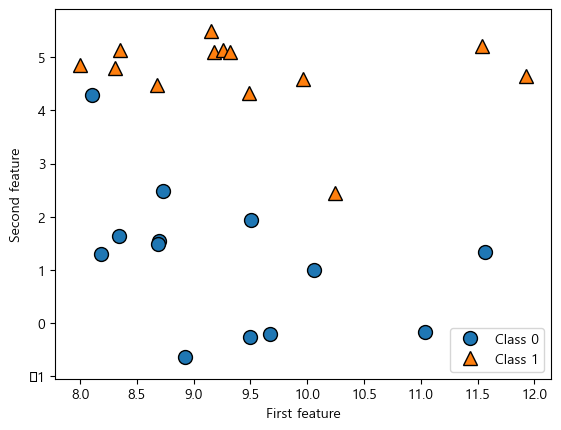

In [28]:
# mglearn을 사용하여 데이터셋 시각화
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #첫번째열을 features로, 그다음열을 features2로
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape",X.shape)
#산점도를 보면 y는 0.1처럼 두가지로 나누어진 타겟임을 알 수 있음

Text(0, 0.5, '타겟')

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


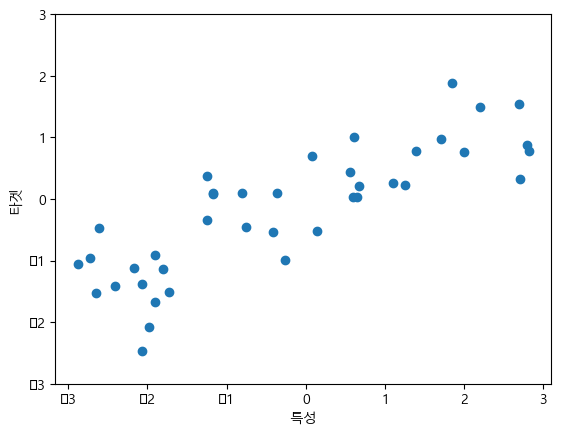

In [51]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
print(cancer.data.shape)

(569, 30)


In [19]:
print("클래스별 샘플 개수:", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
#target_names는 mal이랑 ben이 있는데, 각 클래스의 데이터 갯수를 반환해서 딕셔너리로 만들어주는 코드. zip을 통해서 이름, count(갯수)를 딕셔너리로 만든다.
#형식: {key: value for key, value in iterable}

클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


In [21]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

### k-nearest neighbors

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


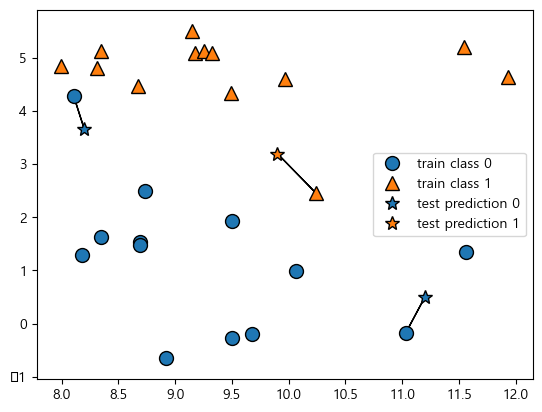

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


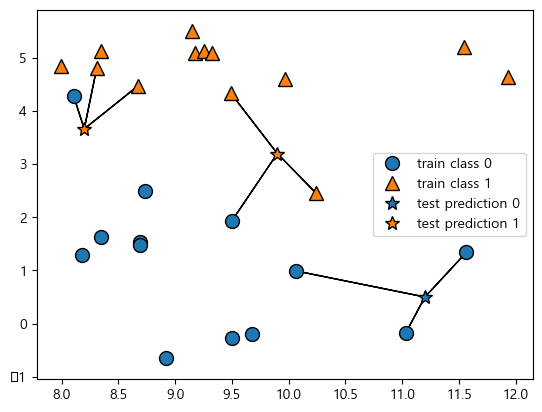

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [31]:
from sklearn.model_selection import train_test_split
X, y =mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [33]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0])

In [35]:
print("테스트 세트 정확도 {:.2f}".format(clf.score(X_test, y_test)))
#format앞은 소수점 두자리까지 포매팅하도록 하는거

테스트 세트 정확도 0.86


### KNeighborsClassifier 분석

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


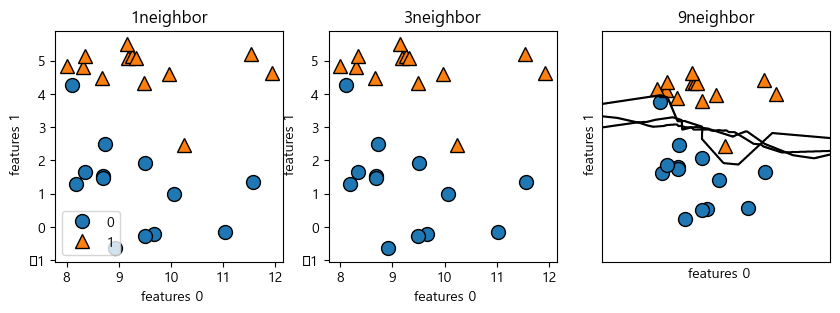

In [36]:
fig, axes=plt.subplots(1, 3, figsize=(10, 3))
#fit메소드는 self오브젝트를 리턴하므로 객체생성과 fit메소드를 한줄에 동시에 쓸수있음
for n_neighbors, ax in zip([1,3,9], axes):
     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) 
     mglearn.plots.plot_2d_separator(clf, X)
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
     ax.set_title("{}neighbor".format(n_neighbors))
     ax.set_xlabel(" features 0")
     ax.set_ylabel(" features 1")
axes[0].legend(loc=3)

### knn 회귀분석에서의 사용

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


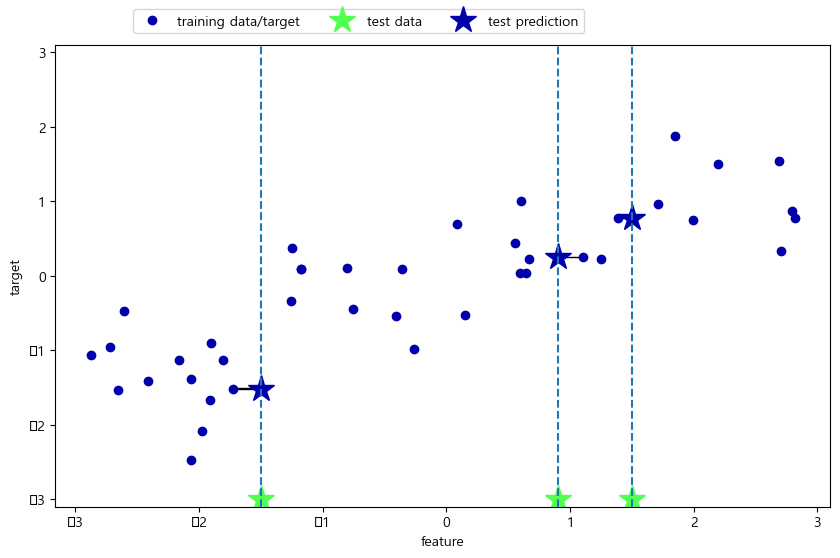

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
from sklearn.neighbors import KNeighborsRegressor

X, y=mglearn.datasets.make_wave(n_samples=40)

In [47]:

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [49]:
print("테스트 세트: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트: 0.83
